## insights of the data that we have found

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df_ranking = pd.read_csv("/Users/takomon/Documents/IT/TechLabs/team2/team02/datasets/3.gold/ranking.csv")
df_gasstation = pd.read_csv("/Users/takomon/Documents/IT/TechLabs/team2/team02/datasets/3.gold/gasstation.csv")


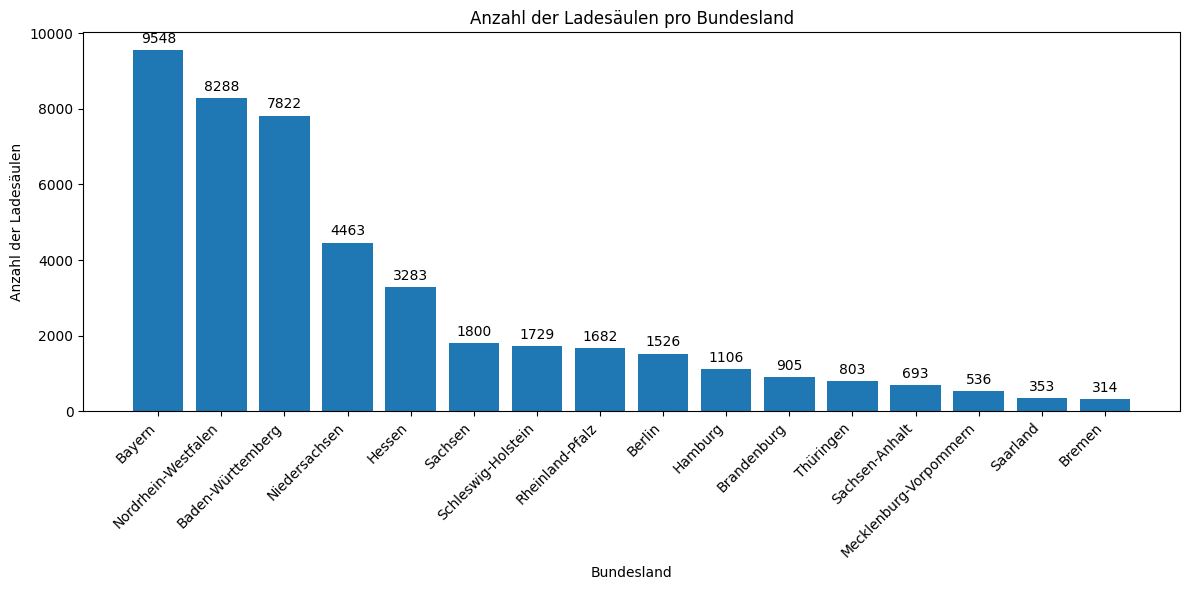

In [8]:
# Charger 

plt.figure(figsize=(12, 6))
bars = plt.bar(df_ranking['Bundesland'], df_ranking['Anzahl der Ladesäulen'])
plt.xlabel('Bundesland')
plt.ylabel('Anzahl der Ladesäulen')
plt.title('Anzahl der Ladesäulen pro Bundesland')
plt.xticks(rotation=45, ha='right')

# Hinzufügen der genauen Anzahl auf die Balken
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 Punkte vertikaler Abstand zur Balkenspitze
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [15]:
display(df_ranking)

,Bundesland,Anzahl der Ladesäulen,Durchschnittliche Entfernung
0,Bayern,9548,78.888694
1,Nordrhein-Westfalen,8288,53.942004
2,Baden-Württemberg,7822,58.211654
3,Niedersachsen,4463,67.136050
4,Hessen,3283,51.895024
5,Sachsen,1800,53.681723
6,Schleswig-Holstein,1729,44.554099
7,Rheinland-Pfalz,1682,55.841631
8,Berlin,1526,6.975358
9,Hamburg,1106,6.455872


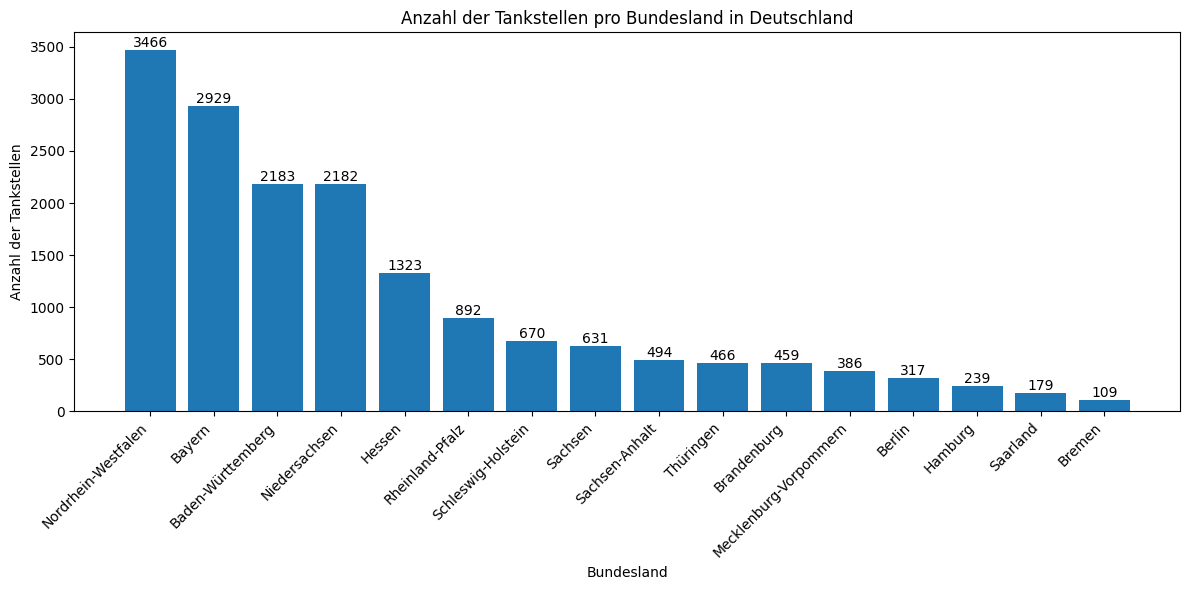

In [11]:



# Zählen Sie die Anzahl der Tankstellen pro Bundesland.
tankstellen_pro_bundesland = df_gasstation['Bundesland'].value_counts().reset_index()
tankstellen_pro_bundesland.columns = ['Bundesland', 'Anzahl der Tankstellen']

# Sortieren Sie das DataFrame nach der Anzahl der Tankstellen (absteigend).
tankstellen_pro_bundesland = tankstellen_pro_bundesland.sort_values(by='Anzahl der Tankstellen', ascending=False)

# Erstellen Sie ein Balkendiagramm zur Visualisierung.
plt.figure(figsize=(12, 6))
bars = plt.bar(tankstellen_pro_bundesland['Bundesland'], tankstellen_pro_bundesland['Anzahl der Tankstellen'])
plt.xlabel('Bundesland')
plt.ylabel('Anzahl der Tankstellen')
plt.title('Anzahl der Tankstellen pro Bundesland in Deutschland')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Fügen Sie die Anzahl der Tankstellen als Textlabels über den Balken hinzu.
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.show()


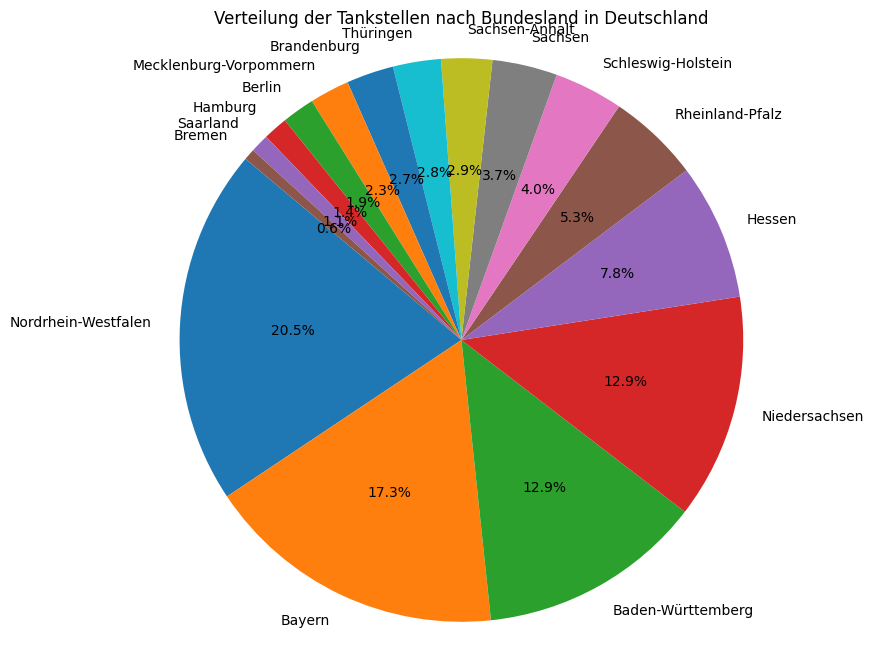

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Annahme: Ihre CSV-Datei heißt "tankstellen.csv" und enthält eine Spalte "Bundesland".

# Lesen Sie die Tankstellen-Daten in ein DataFrame ein.

# Zählen Sie die Anzahl der Tankstellen pro Bundesland.
tankstellen_pro_bundesland = df_gasstation['Bundesland'].value_counts().reset_index()
tankstellen_pro_bundesland.columns = ['Bundesland', 'Anzahl der Tankstellen']

# Sortieren Sie das DataFrame nach der Anzahl der Tankstellen (absteigend).
tankstellen_pro_bundesland = tankstellen_pro_bundesland.sort_values(by='Anzahl der Tankstellen', ascending=False)

# Erstellen Sie ein Kreisdiagramm zur Visualisierung.
plt.figure(figsize=(8, 8))
plt.pie(tankstellen_pro_bundesland['Anzahl der Tankstellen'], labels=tankstellen_pro_bundesland['Bundesland'],
        autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Sorgt dafür, dass das Diagramm rund ist.

plt.title('Verteilung der Tankstellen nach Bundesland in Deutschland')

plt.show()


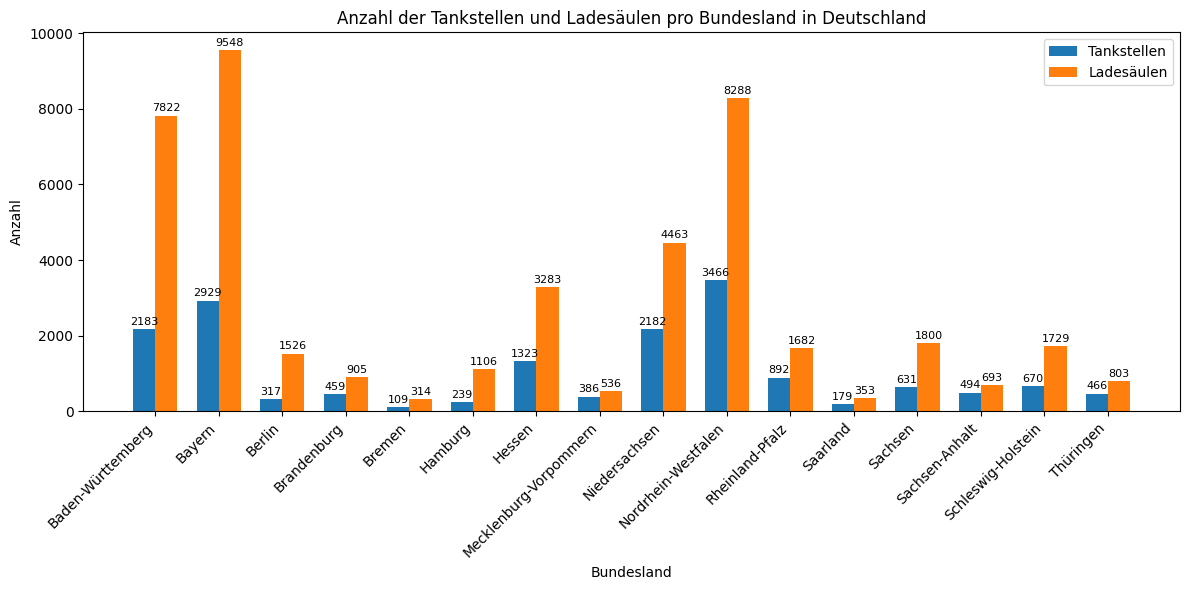

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Annahme: Sie haben zwei DataFrames "df_gasstation" und "df_ranking" mit den relevanten Daten.

# Gruppieren Sie die Daten nach Bundesland und zählen Sie die Anzahl der Tankstellen pro Bundesland.
tankstellen_pro_bundesland = df_gasstation['Bundesland'].value_counts().reset_index()
tankstellen_pro_bundesland.columns = ['Bundesland', 'Anzahl der Tankstellen']

# Gruppieren Sie die Daten nach Bundesland und holen Sie die Anzahl der Ladesäulen pro Bundesland aus "df_ranking".
anzahl_ladesaeulen = df_ranking[['Bundesland', 'Anzahl der Ladesäulen']]

# Merge der beiden DataFrames basierend auf dem Bundesland.
merged_df = pd.merge(tankstellen_pro_bundesland, anzahl_ladesaeulen, on='Bundesland')

# Sortieren Sie das DataFrame nach dem Bundesland (optional).
merged_df = merged_df.sort_values(by='Bundesland')

# Erstellen Sie das gruppierte Balkendiagramm.
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(merged_df['Bundesland']))

bar1 = plt.bar(index, merged_df['Anzahl der Tankstellen'], bar_width, label='Tankstellen')
bar2 = plt.bar(index + bar_width, merged_df['Anzahl der Ladesäulen'], bar_width, label='Ladesäulen')

plt.xlabel('Bundesland')
plt.ylabel('Anzahl')
plt.title('Anzahl der Tankstellen und Ladesäulen pro Bundesland in Deutschland')
plt.xticks(index + bar_width / 2, merged_df['Bundesland'], rotation=45, ha='right')
plt.tight_layout()

# Fügen Sie ein Legend hinzu.
plt.legend()

# Fügen Sie die genauen Werte über den Balken hinzu.
for bar in bar1 + bar2:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=8)

plt.show()
